In [148]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy

In [149]:
def w_0(r):
    return 1/4*(2*np.log(r/alpha)-(r**2-alpha**2))
def w_0_prime(r):
    return 1/2*(1/r-r)

# Arnoldi
All equations implemented
i.e. this means that $u_0$ is treated as an unknown even though we know $u_0=0$

101
0.0
2.0
[           inf            inf 3.40680652e-06            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            

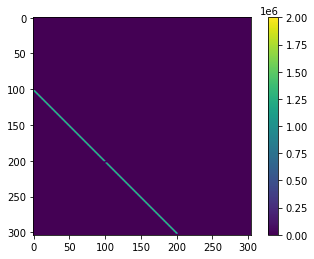

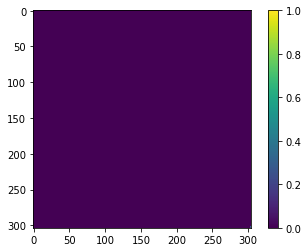

4.0
6.0
8.0
10.0
12.0
14.000000000000002
16.0
18.0
[           inf            inf 3.40238369e-05            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf    

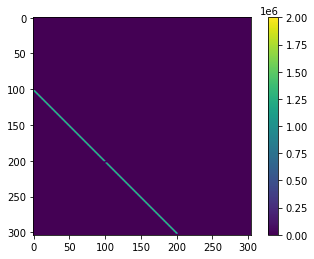

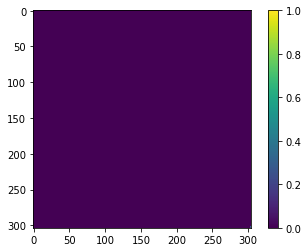

20.0
22.0
24.0
26.0
28.000000000000004
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.00000000000001
57.99999999999999
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0


In [161]:
alpha = 0.9; Re = 0; epsilon = 0.1; Bo = epsilon; Ca = epsilon; Ma = 0;
M = 100;
D = 1 - 2*Ma
r_list = np.linspace(alpha, 1, M+1); h = r_list[1]-r_list[0]
print(len(r_list))
kappa_vect = np.linspace(0.05,1, 50)

k_vect = kappa_vect/epsilon
Lambda_vect = np.zeros_like(kappa_vect, dtype='complex')
for j,k in enumerate(kappa_vect):
    def build_matrix_arnoldi():
        matrix_u_cont = np.zeros((M+1,M+1), dtype = float)
        matrix_w_cont = np.zeros((M+1,M+1), dtype = complex)
        matrix_p_cont = np.zeros((M+1,M+1), dtype = float)
        
        # impose u_0 = 0
        matrix_u_cont[0,0] = 1
        #at r = 1, we use one sided finite differences
        matrix_u_cont[-1, M ]= 3/(2*h)+1
        matrix_u_cont[-1, M-1] = -2/h
        matrix_u_cont[-1, M-2] = 1/(2*h)
        matrix_w_cont[-1, M] = 1j*k
        for j, r in enumerate(r_list[1:-1]):
            j = j+1
            matrix_u_cont[j,j] = 1/r
            matrix_u_cont[j,j-1] = -1/(2*h)
            matrix_u_cont[j,j+1] = 1/(2*h)
            matrix_w_cont[j,j] = 1j*k
        
        matrix_cont = np.concatenate([matrix_u_cont, matrix_w_cont, matrix_p_cont, np.zeros((M+1,1))], axis=1)
        matrix_cont_RHS = np.zeros((M+1,3*M+4), dtype=float)
        #print(np.shape(matrix_cont))
        #print(np.shape(matrix_cont_RHS))
        # continuity done
        
        
        matrix_u_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_w_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_p_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_u_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        matrix_w_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        matrix_p_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        #first impose w_0 = 0
        matrix_w_NS_r[0,0] = 1
        #lets also impose partial_r u =0 at r=alpha
        matrix_u_NS_r[-1,0] = -3/(2*h)
        matrix_u_NS_r[-1, 1] = 2/h
        matrix_u_NS_r[-1,2] = -1/(2*h)
        
        for j, r in enumerate(r_list[1:-1]):
            j=j+1
            matrix_u_NS_r[j,j] = Re*w_0(r)*1j*k + 2/h**2 + k**2 + 1/r**2
            matrix_u_NS_r[j, j-1] = -1/h**2 + 1/(r*2*h)
            matrix_u_NS_r[j, j+1] = -1/h**2 - 1/(r*2*h)
            
            matrix_p_NS_r[j,j+1] = 1/(2*h)
            matrix_p_NS_r[j,j-1] = -1/(2*h)
            
            matrix_u_NSr_RHS[j,j] = -Re #I think -Re

        matrix_NS_r =  np.concatenate([matrix_u_NS_r, matrix_w_NS_r,
                                       matrix_p_NS_r, np.zeros((M+1,1))], axis=1)
        matrix_NS_r_RHS =  np.concatenate([matrix_u_NSr_RHS, matrix_w_NSr_RHS,
                                           matrix_p_NSr_RHS, np.zeros((M+1,1))], axis=1)
        
        #NS_r done
        
        #these matrices have an extra row to incorporate the bc for S
        
        matrix_u_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_w_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_p_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_u_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_w_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_p_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_S_NS_z = np.zeros((M+2, 1), dtype = complex)
        matrix_S_NSz_RHS = np.zeros((M+2, 1), dtype = complex)

        for j, r in enumerate(r_list[1:-1]):
            j=j+1
            matrix_u_NS_z[j,j] = w_0_prime(r)*Re
            
            matrix_w_NS_z[j,j] = 1j*k*w_0(r)*Re + 2/h**2 + k**2
            matrix_w_NS_z[j, j-1] = -1/h**2 + 1/(r*2*h)
            matrix_w_NS_z[j, j+1] = -1/h**2 - 1/(r*2*h)
            
            matrix_p_NS_z[j,j] = 1j*k
            
            matrix_w_NSz_RHS[j,j] = -Re #I think - Re
            

        #tangential
        matrix_u_NS_z[0, -1] = 1j*k
        matrix_w_NS_z[0, -1] = 3/2/h
        matrix_w_NS_z[0, M-1] = -2/h
        matrix_w_NS_z[0, M-2] = -1/(2*h)
        matrix_S_NS_z[0] = -1
        
        #kinematic at penultimate row, M
        matrix_u_NS_z[M, -1] = 1
        matrix_S_NS_z[M] = 1j*k*w_0(1)
        matrix_S_NSz_RHS[M] = 1 
        
        #normal stress at last row M+1 (or [-1])
        matrix_u_NS_z[-1, M-2] = -Ca/h
        matrix_u_NS_z[-1, M-1] = 4*Ca/h
        matrix_u_NS_z[-1, -1] = -3*Ca/h
        matrix_p_NS_z[-1,-1] = Bo
        matrix_S_NS_z[-1] = D-k**2
        
        matrix_NS_z =  np.concatenate([matrix_u_NS_z, matrix_w_NS_z,
                                       matrix_p_NS_z, matrix_S_NS_z], axis=1)
        matrix_NS_z_RHS =  np.concatenate([matrix_u_NSz_RHS, matrix_w_NSz_RHS,
                                           matrix_p_NSz_RHS, matrix_S_NSz_RHS], axis=1)
        A = np.concatenate([matrix_cont, matrix_NS_r, matrix_NS_z], axis=0)
        B = np.concatenate([matrix_cont_RHS, matrix_NS_r_RHS, matrix_NS_z_RHS], axis=0)
        return A,B 
    
    A,B = build_matrix_arnoldi()
    if np.random.random()>0.95:
        #print(A)
        print(evals)
        plt.imshow(np.abs(A)); plt.colorbar()
        plt.show()
        plt.imshow(np.abs(B)); plt.colorbar()
        plt.show()
    evals = scipy.linalg.eigvals(A,B).real
    
    Lambda_vect[j] = np.max(evals[~np.isinf(evals)])
    print(j/len(kappa_vect)*100)

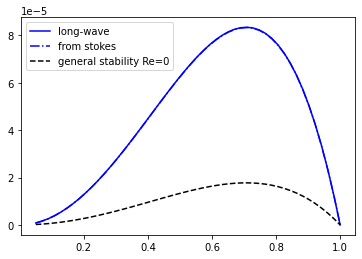

In [162]:
lambda_vect_thin = k_vect**2/3*(D - epsilon**2*k_vect**2)*(1-alpha)**3
lambda_vect = k_vect**2/16*(epsilon**2*k_vect**2-D)*((alpha**2-1)**2-2*(alpha**2-1-2*np.log(alpha)))
plt.plot(epsilon*k_vect, epsilon**2*lambda_vect, label='long-wave', color='blue')
plt.plot(k_vect*epsilon,epsilon**2*lambda_vect_thin,'-.' ,label='from stokes', color='blue')
plt.plot(kappa_vect, epsilon*Lambda_vect.real, '--', label ='general stability Re=0',color='black')
plt.legend()

/var/folders/wx/hvlspwk90qj6x4ybxggkjycr0000gn/T/ipykernel_6675/3687396531.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(kappa_vect, epsilon*lambda_vect_thin/Lambda_vect.real)


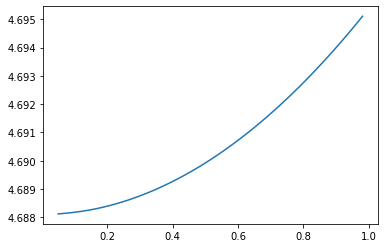

In [163]:
plt.plot(kappa_vect, epsilon*lambda_vect_thin/Lambda_vect.real)

# better behaved matrix

51
0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.000000000000002
16.0
18.0
20.0
[          inf           inf 3.5218973e-05           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
           inf           inf           inf           inf           inf
          

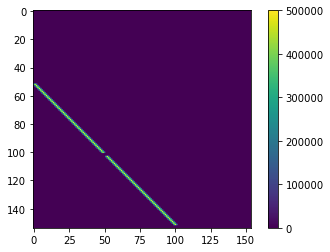

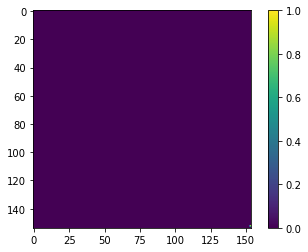

22.0
24.0
26.0
28.000000000000004
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.00000000000001
57.99999999999999
60.0
62.0
[       inf        inf 0.00015368        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf       

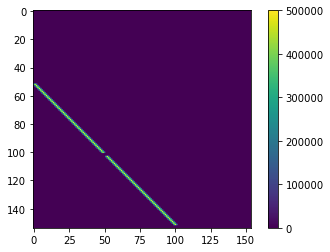

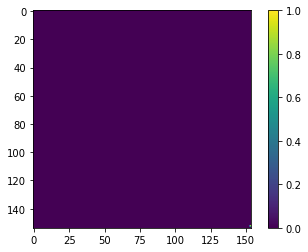

64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0


In [112]:
alpha = 0.9; Re = 0; epsilon = 0.1; Bo = epsilon; Ca = epsilon; Ma = 0;
M = 50;
D = 1 - 2*Ma
r_list = np.linspace(alpha, 1, M+1); h = r_list[1]-r_list[0]
print(len(r_list))
kappa_vect = np.linspace(0.05,1, 50)

k_vect = kappa_vect/epsilon
Lambda_vect = np.zeros_like(kappa_vect, dtype='complex')
for j,k in enumerate(kappa_vect):
    def build_matrix_arnoldi():
        matrix_u_cont = np.zeros((M+1,M+1), dtype=float)
        matrix_w_cont = np.zeros((M+1,M+1), dtype=complex)
        matrix_p_cont = np.zeros((M+1,M+1), dtype=float)
        
        # impose u_0 = 0
        matrix_u_cont[0,0] = 1
        #at r = 1, we use one sided finite differences
        matrix_u_cont[-1, M ]= (3/(2*h)+1)*h
        matrix_u_cont[-1, M-1] = (-2/h)*h
        matrix_u_cont[-1, M-2] = (1/(2*h))*h
        matrix_w_cont[-1, M] = (1j*k)*h
        for j, r in enumerate(r_list[1:-1]):
            j = j+1
            matrix_u_cont[j,j] = 1/r*h
            matrix_u_cont[j,j-1] = -1/(2*h)*h
            matrix_u_cont[j,j+1] = 1/(2*h)*h
            matrix_w_cont[j,j] = 1j*k*h
        
        matrix_cont = np.concatenate([matrix_u_cont, matrix_w_cont, matrix_p_cont, np.zeros((M+1,1))], axis=1)
        matrix_cont_RHS = np.zeros((M+1,3*M+4), dtype=float)
        #print(np.shape(matrix_cont))
        #print(np.shape(matrix_cont_RHS))
        # continuity done
        
        
        matrix_u_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_w_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_p_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_u_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        matrix_w_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        matrix_p_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        #first impose w_0 = 0
        matrix_w_NS_r[0,0] = 1
        #lets also impose partial_r u =0 at r=alpha
        matrix_u_NS_r[-1,0] = -3/(2*h)
        matrix_u_NS_r[-1, 1] = 2/h
        matrix_u_NS_r[-1,2] = -1/(2*h)
        
        for j, r in enumerate(r_list[1:-1]):
            j=j+1
            matrix_u_NS_r[j,j] = Re*w_0(r)*1j*k + 2/h**2 + k**2 + 1/r**2
            matrix_u_NS_r[j, j-1] = -1/h**2 + 1/(r*2*h)
            matrix_u_NS_r[j, j+1] = -1/h**2 - 1/(r*2*h)
            
            matrix_p_NS_r[j,j+1] = 1/(2*h)
            matrix_p_NS_r[j,j-1] = -1/(2*h)
            
            matrix_u_NSr_RHS[j,j] = -Re #I think -Re

        matrix_NS_r =  np.concatenate([matrix_u_NS_r, matrix_w_NS_r,
                                       matrix_p_NS_r, np.zeros((M+1,1))], axis=1)
        matrix_NS_r_RHS =  np.concatenate([matrix_u_NSr_RHS, matrix_w_NSr_RHS,
                                           matrix_p_NSr_RHS, np.zeros((M+1,1))], axis=1)
        
        #NS_r done
        
        #these matrices have an extra row to incorporate the bc for S
        
        matrix_u_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_w_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_p_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_u_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_w_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_p_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_S_NS_z = np.zeros((M+2, 1), dtype = complex)
        matrix_S_NSz_RHS = np.zeros((M+2, 1), dtype = complex)

        for j, r in enumerate(r_list[1:-1]):
            j=j+1
            matrix_u_NS_z[j,j] = w_0_prime(r)*Re
            
            matrix_w_NS_z[j,j] = 1j*k*w_0(r)*Re + 2/h**2 + k**2
            matrix_w_NS_z[j, j-1] = -1/h**2 + 1/(r*2*h)
            matrix_w_NS_z[j, j+1] = -1/h**2 - 1/(r*2*h)
            
            matrix_p_NS_z[j,j] = 1j*k
            
            matrix_w_NSz_RHS[j,j] = -Re #I think - Re
            

        #tangential
        matrix_u_NS_z[0, -1] = 1j*k
        matrix_w_NS_z[0, -1] = 3/2/h
        matrix_w_NS_z[0, M-1] = -2/h
        matrix_w_NS_z[0, M-2] = -1/(2*h)
        matrix_S_NS_z[0] = -1
        
        #kinematic at penultimate row, M
        matrix_u_NS_z[M, -1] = 1
        matrix_S_NS_z[M] = 1j*k*w_0(1)
        matrix_S_NSz_RHS[M] = 1 
        
        #normal stress at last row M+1 (or [-1])
        matrix_u_NS_z[-1, M-2] = -Ca/h
        matrix_u_NS_z[-1, M-1] = 4*Ca/h
        matrix_u_NS_z[-1, -1] = -3*Ca/h
        matrix_p_NS_z[-1,-1] = Bo
        matrix_S_NS_z[-1] = D-k**2
        
        matrix_NS_z =  np.concatenate([matrix_u_NS_z, matrix_w_NS_z,
                                       matrix_p_NS_z, matrix_S_NS_z], axis=1)
        matrix_NS_z_RHS =  np.concatenate([matrix_u_NSz_RHS, matrix_w_NSz_RHS,
                                           matrix_p_NSz_RHS, matrix_S_NSz_RHS], axis=1)
        A = np.concatenate([matrix_cont, matrix_NS_r, matrix_NS_z], axis=0)
        B = np.concatenate([matrix_cont_RHS, matrix_NS_r_RHS, matrix_NS_z_RHS], axis=0)
        return A,B 
    
    A,B = build_matrix_arnoldi()
    if np.random.random()>0.95:
        #print(A)
        print(evals)
        plt.imshow(np.abs(A)); plt.colorbar()
        plt.show()
        plt.imshow(np.abs(B)); plt.colorbar()
        plt.show()
    evals = scipy.linalg.eigvals(A,B).real
    
    Lambda_vect[j] = np.max(evals[~np.isinf(evals)])
    print(j/len(kappa_vect)*100)

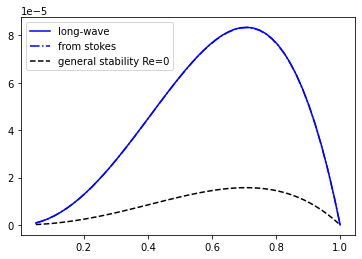

In [113]:

lambda_vect_thin = k_vect**2/3*(D - epsilon**2*k_vect**2)*(1-alpha)**3
lambda_vect = k_vect**2/16*(epsilon**2*k_vect**2-D)*((alpha**2-1)**2-2*(alpha**2-1-2*np.log(alpha)))
plt.plot(epsilon*k_vect, epsilon**2*lambda_vect, label='long-wave', color='blue')
plt.plot(k_vect*epsilon,epsilon**2*lambda_vect_thin,'-.' ,label='from stokes', color='blue')
plt.plot(kappa_vect, epsilon*Lambda_vect.real, '--', label ='general stability Re=0',color='black')
plt.legend()

# Less equations
This incorporates knowledge from the BCs directly into the unkowns
For example we take $a_0 = b_0 =0$ and as we also know $da/dt=0$ at the wall we use that directly

In [ ]:
alpha = 0.9; Re = 0; epsilon = 0.1; Bo = epsilon; Ca = epsilon; Ma = 0;
M = 50;
D = 1 - 2*Ma
r_list = np.linspace(alpha, 1, M+1); h = r_list[1]-r_list[0]
print(len(r_list))
kappa_vect = np.linspace(0.05,1, 50)

k_vect = kappa_vect/epsilon
Lambda_vect = np.zeros_like(kappa_vect, dtype='complex')
for j,k in enumerate(kappa_vect):
    def build_matrix_arnoldi():
        matrix_u_cont = np.zeros((M+1,M+1), dtype = float)
        matrix_w_cont = np.zeros((M+1,M+1), dtype = complex)
        matrix_p_cont = np.zeros((M+1,M+1), dtype = float)
        
        # impose u_0 = 0
        matrix_u_cont[0,0] = 1
        #at r = 1, we use one sided finite differences
        matrix_u_cont[-1, M ]= 3/(2*h)+1
        matrix_u_cont[-1, M-1] = -2/h
        matrix_u_cont[-1, M-2] = 1/(2*h)
        matrix_w_cont[-1, M] = 1j*k
        for j, r in enumerate(r_list[1:-1]):
            j = j+1
            matrix_u_cont[j,j] = 1/r
            matrix_u_cont[j,j-1] = -1/(2*h)
            matrix_u_cont[j,j+1] = 1/(2*h)
            matrix_w_cont[j,j] = 1j*k
        
        matrix_cont = np.concatenate([matrix_u_cont, matrix_w_cont, matrix_p_cont, np.zeros((M+1,1))], axis=1)
        matrix_cont_RHS = np.zeros((M+1,3*M+4), dtype=float)
        #print(np.shape(matrix_cont))
        #print(np.shape(matrix_cont_RHS))
        # continuity done
        
        
        matrix_u_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_w_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_p_NS_r = np.zeros((M+1,M+1), dtype=complex)
        matrix_u_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        matrix_w_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        matrix_p_NSr_RHS = np.zeros((M+1,M+1), dtype=complex)
        #first impose w_0 = 0
        matrix_w_NS_r[0,0] = 1
        #lets also impose partial_r u =0 at r=alpha
        matrix_u_NS_r[-1,0] = -3/(2*h)
        matrix_u_NS_r[-1, 1] = 2/h
        matrix_u_NS_r[-1,2] = -1/(2*h)
        
        for j, r in enumerate(r_list[1:-1]):
            j=j+1
            matrix_u_NS_r[j,j] = Re*w_0(r)*1j*k + 2/h**2 + k**2 + 1/r**2
            matrix_u_NS_r[j, j-1] = -1/h**2 + 1/(r*2*h)
            matrix_u_NS_r[j, j+1] = -1/h**2 - 1/(r*2*h)
            
            matrix_p_NS_r[j,j+1] = 1/(2*h)
            matrix_p_NS_r[j,j-1] = -1/(2*h)
            
            matrix_u_NSr_RHS[j,j] = -Re #I think -Re

        matrix_NS_r =  np.concatenate([matrix_u_NS_r, matrix_w_NS_r,
                                       matrix_p_NS_r, np.zeros((M+1,1))], axis=1)
        matrix_NS_r_RHS =  np.concatenate([matrix_u_NSr_RHS, matrix_w_NSr_RHS,
                                           matrix_p_NSr_RHS, np.zeros((M+1,1))], axis=1)
        
        #NS_r done
        
        #these matrices have an extra row to incorporate the bc for S
        
        matrix_u_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_w_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_p_NS_z = np.zeros((M+2,M+1), dtype=complex)
        matrix_u_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_w_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_p_NSz_RHS = np.zeros((M+2,M+1), dtype=complex)
        matrix_S_NS_z = np.zeros((M+2, 1), dtype = complex)
        matrix_S_NSz_RHS = np.zeros((M+2, 1), dtype = complex)

        for j, r in enumerate(r_list[1:-1]):
            j=j+1
            matrix_u_NS_z[j,j] = w_0_prime(r)*Re
            
            matrix_w_NS_z[j,j] = 1j*k*w_0(r)*Re + 2/h**2 + k**2
            matrix_w_NS_z[j, j-1] = -1/h**2 + 1/(r*2*h)
            matrix_w_NS_z[j, j+1] = -1/h**2 - 1/(r*2*h)
            
            matrix_p_NS_z[j,j] = 1j*k
            
            matrix_w_NSz_RHS[j,j] = -Re #I think - Re
            

        #tangential
        matrix_u_NS_z[0, -1] = 1j*k
        matrix_w_NS_z[0, -1] = 3/2/h
        matrix_w_NS_z[0, M-1] = -2/h
        matrix_w_NS_z[0, M-2] = -1/(2*h)
        matrix_S_NS_z[0] = -1
        
        #kinematic at penultimate row, M
        matrix_u_NS_z[M, -1] = 1
        matrix_S_NS_z[M] = 1j*k*w_0(1)
        matrix_S_NSz_RHS[M] = 1 
        
        #normal stress at last row M+1 (or [-1])
        matrix_u_NS_z[-1, M-2] = -Ca/h
        matrix_u_NS_z[-1, M-1] = 4*Ca/h
        matrix_u_NS_z[-1, -1] = -3*Ca/h
        matrix_p_NS_z[-1,-1] = Bo
        matrix_S_NS_z[-1] = D-k**2
        
        matrix_NS_z =  np.concatenate([matrix_u_NS_z, matrix_w_NS_z,
                                       matrix_p_NS_z, matrix_S_NS_z], axis=1)
        matrix_NS_z_RHS =  np.concatenate([matrix_u_NSz_RHS, matrix_w_NSz_RHS,
                                           matrix_p_NSz_RHS, matrix_S_NSz_RHS], axis=1)
        A = np.concatenate([matrix_cont, matrix_NS_r, matrix_NS_z], axis=0)
        B = np.concatenate([matrix_cont_RHS, matrix_NS_r_RHS, matrix_NS_z_RHS], axis=0)
        return A,B 
    
    A,B = build_matrix_arnoldi()
    if np.random.random()>0.95:
        #print(A)
        print(evals)
        plt.imshow(np.abs(A)); plt.colorbar()
        plt.show()
        plt.imshow(np.abs(B)); plt.colorbar()
        plt.show()
    evals = scipy.linalg.eigvals(A,B).real
    
    Lambda_vect[j] = np.max(evals[~np.isinf(evals)])
    print(j/len(kappa_vect)*100)